### **Modeling**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\Sanjana\Downloads\project retrun\dataset\Cleaned\final_merged_dataset.csv")
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id_encoded,thal_encoded,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,6,1,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,147,1,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,172,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,112,2,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,133,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,40,2,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,22,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,131,2,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,5,1,0


In [6]:
X = df.drop(["heart_disease_present", "patient_id", "thal"], axis=1)
y = df["heart_disease_present"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LogisticRegression(max_iter=300)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=300)

In [10]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.4444444444444444


In [11]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.44      1.00      0.62        16

    accuracy                           0.44        36
   macro avg       0.22      0.50      0.31        36
weighted avg       0.20      0.44      0.27        36



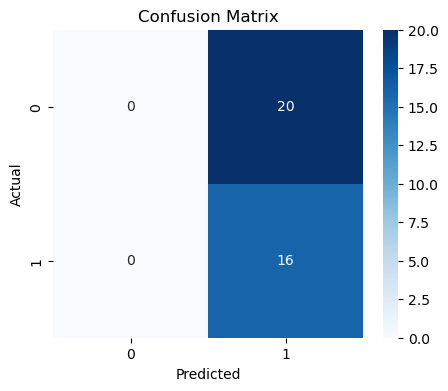

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

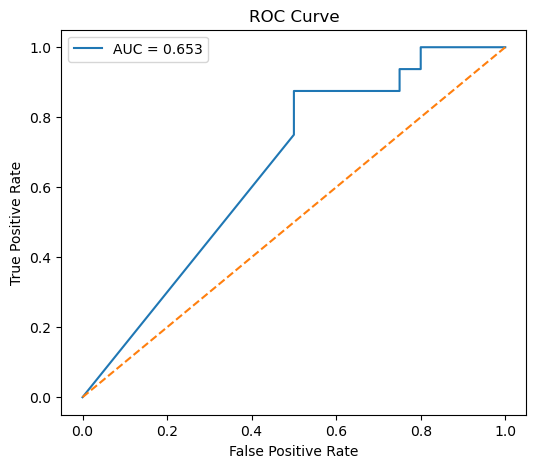

AUC Score: 0.653125


In [15]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)